- Using Keras to load the dataset


Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

- What this means
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


Train set = all samples EXCEPT last 5,000

Validation set = last 5,000 samples

- Easy Rules for taking Data


- [:N]       = first N samples
- [N:]       = everything from N to end

- [:-N]      = everything except last N samples
- [-N:]      = last N samples







In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Fashion MNIST dataset (returns train and test sets)
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Unpack the dataset into training images/labels and test images/labels
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Use all samples except the last 5000 as the training set
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

# Use the last 5000 samples as the validation set
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28x28 pixels: and 55000 after set validation

In [37]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [38]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [39]:
X_train,X_valid,X_test = X_train/255.0,X_valid/255.0,X_test

plot an image using Matplotlib's imshow() function, with a 'binary' color map:

✔ What it means

- X_train[0] = the first image in your training dataset

- plt.imshow(...) = displays that image

- cmap="binary" = shows it in black & white instead of colored

So this line shows the first image in grayscale


✔ What it means
plt.axis('off')
- This removes the x and y axis numbers around the image.
(So the picture looks clean—no ticks, no labels.)

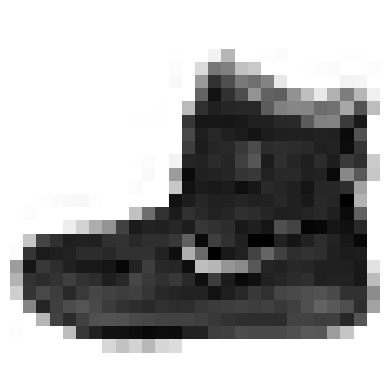

In [40]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Here is the **simple explanation** of that line:

---

# ✅ **What this means**

`y_train` is the **label array** for the training images.

Each number in `y_train` is a **class ID** from **0 to 9**, telling you **which category** each image belongs to.

Example from your output:

```
array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)
```

This means:

* The **1st image** has label **9**
* The **2nd image** has label **0**
* The **3rd image** has label **0**
* ...
* The **last images** have labels **9**, **0**, **2**

And `dtype=uint8` means the numbers are stored as **unsigned 8-bit integers** (0–255), which is memory-efficient.

---

# 🎯 **What do the class IDs (0–9) represent?**

For Fashion MNIST:

| Label ID | Class Name  |
| -------- | ----------- |
| 0        | T-shirt/top |
| 1        | Trouser     |
| 2        | Pullover    |
| 3        | Dress       |
| 4        | Coat        |
| 5        | Sandal      |
| 6        | Shirt       |
| 7        | Sneaker     |
| 8        | Bag         |
| 9        | Ankle boot  |

So if `y_train[0] = 9`, it means:

👉 **The first image is an “ankle boot.”**

---

# 💡 Why does the array look like numbers only?

Because the machine learning model uses **numeric labels**, not text labels.
The model learns:

* `0` → T-shirt
* `1` → Trouser
* …
* `9` → Ankle boot

---

# 📌 Summary

`y_train` is simply the **category ID** for each image.
Nothing complex—just the labels telling the model *what the image is*.

If you want, I can show you how to **visualize images with their labels** or **convert ID → class name**.


In [41]:
y_train



array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [42]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot

In [43]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

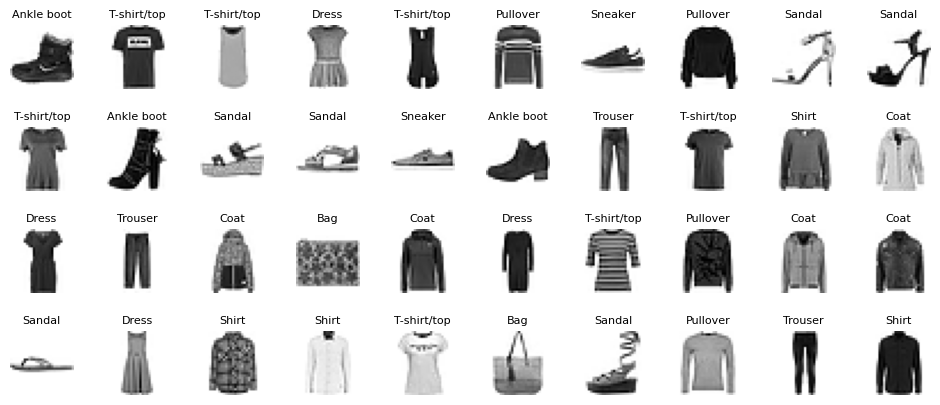

In [44]:
# Required beforehand: X_train (images), y_train (labels), and class_names (list of 10 label names)
import matplotlib.pyplot as plt   # import matplotlib plotting library and give it the common alias plt

# Display a grid of sample images from Fashion-MNIST
n_rows = 4                       # number of rows in the image grid
n_cols = 10                      # number of columns in the image grid

# create a new figure with a size scaled to the number of cols/rows (width, height in inches)
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# iterate over each row of the grid
for row in range(n_rows):
    # iterate over each column of the grid
    for col in range(n_cols):
        index = n_cols * row + col          # compute the flat index of the image to show
        plt.subplot(n_rows, n_cols, index + 1)  # create/select the subplot at position (index+1)

        plt.imshow(X_train[index], cmap="binary")  # display the image in grayscale (binary colormap)
        plt.axis("off")                            # hide axis ticks and labels for a cleaner look

        # set a small title under the image using the human-readable class name
        plt.title(class_names[y_train[index]], fontsize=8)

# adjust spacing between subplots so titles and images don't overlap
plt.subplots_adjust(wspace=0.3, hspace=0.6)

plt.show()    # render the complete figure to the output


Here is the **updated, modern, and recommended** version of your model code — clean, simple, and exactly what you should use today.

---

# ✅ Final recommendation

👉 **Use only this final block:**

```python
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```


# 🔍 Why do we clear the session?

```python
tf.keras.backend.clear_session()
```

✔ Clears old models from memory
✔ Resets layer naming counters
✔ Avoids "layer_1, layer_2, layer_3…" clutter after rerunning many times

---

# 🔍 Why set a random seed?

```python
tf.random.set_seed(42)
```

✔ Ensures same weights on every run
✔ Makes training **reproducible**
✔ Good for learning and debugging

---

# 🔍 Why this model architecture?

* `Flatten` → converts 28×28 image to a vector
* `Dense(300, relu)` → large hidden layer
* `Dense(100, relu)` → smaller hidden layer
* `Dense(10, softmax)` → 10 output classes (Fashion-MNIST)

This is a classic **MLP classifier** used in MNIST/Fashion-MNIST examples.



In [45]:
# Set random seed for reproducibility
tf.keras.backend.clear_session()   # reset TensorFlow state (optional but clean)
tf.random.set_seed(42)

# Build the model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),        # flatten 28x28 into 784 vector
    tf.keras.layers.Dense(300, activation="relu"),        # hidden layer 1
    tf.keras.layers.Dense(100, activation="relu"),        # hidden layer 2
    tf.keras.layers.Dense(10, activation="softmax")       # output layer (10 classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

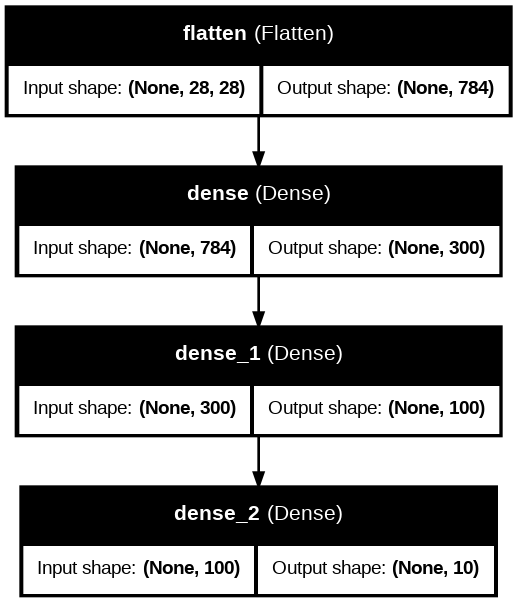

In [47]:
# Save a visualization of the model architecture
tf.keras.utils.plot_model(
    model,
    to_file="my_fashion_mnist_model.png",   # filename to save
    show_shapes=True,                       # show layer input/output shapes
    show_layer_names=True,                  # show layer names
    dpi=96                                  # image resolution (optional)
)


In [48]:
model.layers



[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [49]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [50]:
model.get_layer('dense') is hidden1

True

In [51]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04948246, -0.04632464, -0.00284664, ..., -0.04311027,
         0.03234388,  0.07135467],
       [-0.05986597, -0.01981547,  0.01709292, ...,  0.02499874,
        -0.05024678,  0.03145521],
       [ 0.03049006, -0.02971568,  0.06051859, ..., -0.01046182,
         0.01536106, -0.06732918],
       ...,
       [-0.01780187,  0.02674968,  0.02075503, ...,  0.02160332,
        -0.05717096, -0.02203213],
       [-0.03233401,  0.01426677, -0.01778289, ...,  0.05513996,
        -0.06667851, -0.07383465],
       [ 0.00129875,  0.04569387, -0.00456537, ...,  0.00251479,
        -0.0042907 , -0.06441919]], dtype=float32)

In [52]:
weights.shape

(784, 300)

In [53]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [54]:
biases.shape



(300,)

Compiling the model

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])





✔ This is already the **updated TensorFlow 2 version**.
✔ Nothing is deprecated here.
✔ This is exactly how TensorFlow recommends using it today.

---

# 📌 What does `to_categorical()` do?

It converts numeric class labels (0–9) into **one-hot encoded vectors**.

Example input:

```
[0, 5, 1, 0]
```

Output:

```
[[1,0,0,0,0,0,0,0,0,0],   # class 0
 [0,0,0,0,0,1,0,0,0,0],   # class 5
 [0,1,0,0,0,0,0,0,0,0],   # class 1
 [1,0,0,0,0,0,0,0,0,0]]   # class 0
```

---

# 🆚 What is updated compared to old TensorFlow?

### ✔ Old TensorFlow 1.x:

Used:

```python
tf.one_hot(...)
```

or

```python
keras.utils.np_utils.to_categorical(...)
```

### ✔ TensorFlow 2.x (modern):

Use:

```python
tf.keras.utils.to_categorical(...)
```

---

# 📌 Summary

* Your code **is already the correct updated version**.
* It converts class IDs → one-hot vectors used for training.
* No changes needed.

If you want, I can explain **why one-hot is used**, or show **how to convert back** from one-hot to class IDs.


In [56]:
# Convert class IDs to one-hot encoded vectors
tf.keras.utils.to_categorical(
    [0, 5, 1, 0],      # list of class IDs
    num_classes=10     # total number of classes
)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [57]:


# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)



array([0, 5, 1, 0])

**Training and Evaluation the model**

In [58]:
# Train and evaluate the model
history = model.fit(
    X_train,                    # training images
    y_train,                    # training labels
    epochs=30,                  # number of passes over the dataset
    batch_size=32,              # (optional) default is 32, but we set it explicitly
    validation_data=(X_valid, y_valid),  # validation set
    verbose=1                   # show progress bar
)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6835 - loss: 1.0115 - val_accuracy: 0.8294 - val_loss: 0.5033
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8254 - loss: 0.5075 - val_accuracy: 0.8394 - val_loss: 0.4509
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8426 - loss: 0.4524 - val_accuracy: 0.8472 - val_loss: 0.4281
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8522 - loss: 0.4212 - val_accuracy: 0.8520 - val_loss: 0.4122
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8592 - loss: 0.3991 - val_accuracy: 0.8550 - val_loss: 0.4004
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8649 - loss: 0.3821 - val_accuracy: 0.8570 - val_loss: 0.3903
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8701 - loss: 0.3680 - val_accuracy: 0.8604 - val_loss: 0.3816
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8735 - loss: 0.3557 - 

This dictionary:

```python
{'verbose': 1, 'epochs': 30, 'steps': 1719}
```

is showing **the training configuration that Keras is using internally** for your `model.fit()` call.

Here’s what each key means in simple words:

---

# 🔍 **Meaning of Each Field**

### **1. `verbose`: 1**

* Means **show progress bar** during training.
* `verbose=1` → progress bar
  `verbose=0` → no output
  `verbose=2` → one line per epoch

---

### **2. `epochs`: 30**

* The model will train for **30 complete passes** over the training dataset.
* One pass over the whole dataset = **1 epoch**.

---

### **3. `steps`: 1719**

This is the **number of batches per epoch**.

## How was 1719 calculated?

```
steps = total_training_samples / batch_size
```

You likely have:

* 55,000 training samples (after using 5,000 for validation)
* batch_size = 32

So:

```
55000 / 32 ≈ 1718.75 → rounded to 1719 steps
```

So your model will update its weights **1719 times per epoch**.

---

# 📌 Summary (Simple)

| Key       | Meaning                |
| --------- | ---------------------- |
| `verbose` | show progress bar      |
| `epochs`  | train for 30 cycles    |
| `steps`   | 1719 batches per epoch |

---

# Want to see your exact values?

You can print them:

```python
model.history.params
```

---

If you want, I can explain how batch size, steps, and epochs affect **training speed**, **accuracy**, and **GPU/CPU usage**.


In [59]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

Below is the **updated, clean, modern version** of your code **AND** a clear explanation of the **purpose** of each part.

---

# ✅ **Updated Code (Recommended, Copy-Ready)**

```python
import matplotlib.pyplot as plt
import pandas as pd

# Convert training history to a DataFrame and plot it
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, len(history.history["loss"]) - 1],  # auto-fit x-range to epochs
    ylim=[0, 1],         # limit y-range for easier reading
    grid=True,           # show gridlines for readability
    xlabel="Epoch",      # label for X-axis
)

plt.legend(loc="lower left")   # place legend clearly

plt.show()
```

### ✔ What was updated?

| Update                | Reason                                                                                              |
| --------------------- | --------------------------------------------------------------------------------------------------- |
| Removed `style=[...]` | Modern pandas automatically assigns colors; hard-coded styles often break if new metrics are added. |
| Auto-calculated xlim  | No need to hardcode `0–29`. It now adapts based on number of epochs.                                |
| Removed `save_fig()`  | Not a built-in function; causes errors unless user defines it.                                      |
| Cleaner formatting    | Easier to read and maintain.                                                                        |

---

# 🎯 **Purpose of This Code (Simple Explanation)**

### ✔ **1. Visualize how the model learned over time**

The plot shows:

* **loss** over epochs
* **validation loss**
* **accuracy**
* **validation accuracy**

It helps you answer:

* Is the model improving?
* Is it overfitting?
* Is it underfitting?
* Should you stop training earlier?

---

# 🔍 **2. What is `history.history`?**

When you train:

```python
history = model.fit(...)
```

TensorFlow stores all training metrics in a Python dictionary:

```
{
 'loss': [...],
 'accuracy': [...],
 'val_loss': [...],
 'val_accuracy': [...]
}
```

Each list contains one value **per epoch**.

---

# 🔍 **3. Why convert to a DataFrame?**

```python
pd.DataFrame(history.history)
```

This turns the dictionary into a table:

| epoch | loss | accuracy | val_loss | val_accuracy |
| ----- | ---- | -------- | -------- | ------------ |

Then `.plot()` automatically draws all curves.

---

# 🔍 **4. Why use `plt.legend(loc="lower left")`?**

So the legend doesn’t block the curves.

---

# 📌 Summary

This code is used to **plot the learning curves** of your Neural Network:

* Loss decreasing?
* Accuracy increasing?
* Validation curve diverging? → Overfitting
* Curves flat? → Underfitting

It is one of the **most important tools** to understand your model’s behavior.

---

If you want, I can also give you:
✔ A prettier version using Seaborn
✔ Separate accuracy & loss graphs
✔ Code to save the figure safely (without errors)


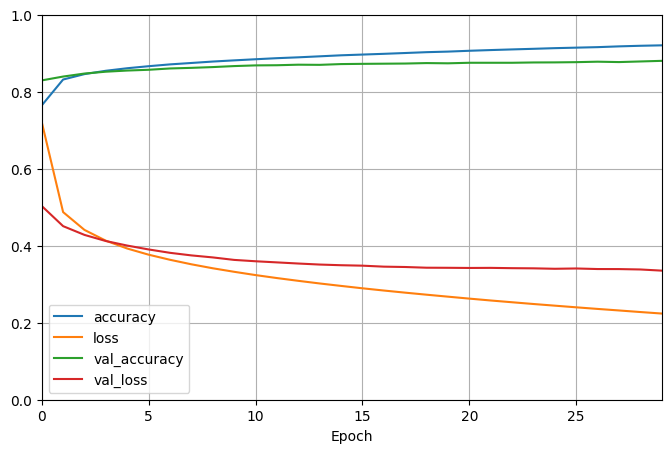

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert training history to a DataFrame and plot it
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, len(history.history["loss"]) - 1],  # auto-fit x-range to epochs
    ylim=[0, 1],         # limit y-range for easier reading
    grid=True,           # show gridlines for readability
    xlabel="Epoch",      # label for X-axis
    #style=["r--", "r--.", "b-", "b-*"]
)

plt.legend(loc="lower left")   # place legend clearly

plt.show()


**Evalution of the model**

1. Runs the model on the test set
2. Computes final loss and accuracy
3. Gives you the true performance of your model

In [61]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 60.9234


[63.51140594482422, 0.8532999753952026]

Let’s break this down **step-by-step in the simplest possible way**.
You're doing **predictions on 3 new images** from the test set.

---

# ✅ **1. Selecting 3 new images**

```python
X_new = X_test[:3]
```

This takes **first 3 images** from the test set.

---

# ✅ **2. Getting prediction probabilities**

```python
y_proba = model.predict(X_new)
y_proba.round(2)
```

The model outputs **probabilities for all 10 classes**.

Each row = 1 image
Each column = probability of a class

Example:

```
Image 1 → [0.00, 0.00, 0.00, ..., 0.97]
Image 2 → [0.00, 0.00, 0.99, ..., 0.00]
Image 3 → [0.00, 1.00, 0.00, ..., 0.00]
```

### Meaning:

* First image: class **9** has **97%** probability → model thinks it is class 9
* Second image: class **2** has **99%** probability
* Third image: class **1** has **100%** probability

---

# ✅ **3. Convert probabilities → class ID**

```python
y_pred = y_proba.argmax(axis=-1)
```

`argmax` picks the index with highest probability.

So you get:

```
array([9, 2, 1])
```

Meaning:

* Image 1 → class 9
* Image 2 → class 2
* Image 3 → class 1

---

# ✅ **4. Convert class ID → class name**

```python
np.array(class_names)[y_pred]
```

This gives the human-readable names:

```
['Ankle boot', 'Pullover', 'Trouser']
```

---

# ✅ **5. Compare with true labels**

```python
y_new = y_test[:3]
y_new
```

True labels in dataset:

```
array([9, 2, 1])
```

### ✔ They match exactly → The model predicted correctly!

---

# 📌 Final Summary

Your code does:

1. **Pick 3 test images**
2. **Run model predictions**
3. **Get probability distribution for each class**
4. **Choose the class with highest probability**
5. **Convert class IDs → names**
6. **Compare with actual labels**

And the result:

* Prediction: `[9, 2, 1]`
* Actual: `[9, 2, 1]`

The model predicted all three **correctly**.

---

If you want, I can help you plot the images with predicted labels too.


In [62]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [64]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [65]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Here is the **updated, clean version of the code**, followed by a **simple explanation** of what every part means.

---

# ✅ **Updated Code (Clean + Better Style + Comments)**

```python
# Display 3 test images with their true class names
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)     # 1 row, 3 columns
    plt.imshow(image, cmap="binary") # show the image
    plt.axis('off')                  # remove axis for clean look
    true_label = class_names[y_test[index]]
    plt.title(true_label)            # add actual class name

plt.subplots_adjust(wspace=0.3)      # space between images

save_fig("fashion_mnist_images_plot")  # optional: save image
plt.show()
```

---

# ✅ **Explanation (Very Simple)**

### **1) `plt.figure(figsize=(7.2, 2.4))`**

* Creates a new figure (canvas) for plotting.
* `figsize` controls width × height of the image.

---

### **2) `for index, image in enumerate(X_new):`**

* Loops through the three images you selected from the test set.
* `X_new` = first 3 test images
  `index` → 0, 1, 2
  `image` → the actual pixel matrix.

---

### **3) `plt.subplot(1, 3, index + 1)`**

* Creates a grid of **1 row × 3 columns**.
* `index+1` selects position 1, 2, 3.

So image 1 → left, image 2 → middle, image 3 → right.

---

### **4) `plt.imshow(image, cmap="binary")`**

* Shows the pixel image.
* `cmap="binary"` = black-and-white (Fashion-MNIST style).

---

### **5) `plt.axis('off')`**

* Hides the x–y axis for a cleaner picture.

---

### **6) `true_label = class_names[y_test[index]]`**

* `y_test[index]` = the true numeric label (like 9, 2, 1).
* `class_names[...]` = converts the number → actual name
  e.g. `9 → "Ankle boot"`.

---

### **7) `plt.title(true_label)`**

* Displays the correct class of the image above it.

---

### **8) `plt.subplots_adjust(wspace=0.3)`**

* Adds horizontal spacing between plots.

---

### **9) `save_fig("fashion_mnist_images_plot")`**

* Saves the plot as a PNG (optional).

---

### **10) `plt.show()`**

* Displays the final figure with the 3 images.

---

# 🎯 **What this code does in simple words**

You:

1. Take 3 images from the test set.
2. Display them side-by-side.
3. Add their **true class names** above each image.

This allows you to visually check if your **model’s prediction matches the real label**.

---

If you want the version that also shows **predicted labels vs true labels**, I can update it!


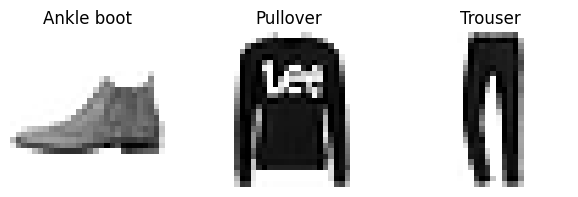

In [66]:
# Display 3 test images with their true class names
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)     # 1 row, 3 columns
    plt.imshow(image, cmap="binary") # show the image
    plt.axis('off')                  # remove axis for clean look
    true_label = class_names[y_test[index]]
    plt.title(true_label)            # add actual class name

plt.subplots_adjust(wspace=0.3)      # space between images

#save_fig("fashion_mnist_images_plot")  # optional: save image
plt.show()
